In [ ]:
# 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,791 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [1]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/연구실용/"
path2 = "/content/drive/My Drive/연구실/"

In [4]:
data = pd.read_csv(path2+"전처리최종이었음좋겠다.csv")

In [5]:
X = data.drop(['한국표준산업분류코드10차(중분류)', '수익률 (1개월)(%)', 'macro_뉴스심리지수',
               'yearmonth', 'Ticker'], axis=1)
y = data['수익률 (1개월)(%)']
ym = data['yearmonth']
tk = data['Ticker']

In [ ]:
X.columns

Index(['베타 (D,1Yr)', 'PER(배)', 'PSR(배)', 'chmom', 'mom36m', 'zerotrade',
       'std_turn', 'mean_ill', 'retvol', 'maxret', 'var_market', 'mom1m',
       'mom12m', 'indmom', 'turn', 'mvel1', 'dolvol', 'betasq', 'Idiovol',
       'macro_(콜금리-기준금리)평균', 'macro_원/달러환율', 'macro_금($/OZ)', 'macro_KOSPI dp',
       'macro_KOSPI PER', 'macro_KOSPI PBR', 'macro_CD Rate',
       'macro_Term spread', 'macro_Default Spread', 'macro_VKOSPI 200'],
      dtype='object')

In [ ]:
X.shape

(312185, 29)

In [ ]:
X.iloc[:, :19].columns

Index(['베타 (D,1Yr)', 'PER(배)', 'PSR(배)', 'chmom', 'mom36m', 'zerotrade',
       'std_turn', 'mean_ill', 'retvol', 'maxret', 'var_market', 'mom1m',
       'mom12m', 'indmom', 'turn', 'mvel1', 'dolvol', 'betasq', 'Idiovol'],
      dtype='object')

In [6]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 13.3 MB/s eta 0:00:00


# R2oos

In [7]:
# GBRT
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_gbrt = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"GBRT_bayesian_r2oos_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_gbrt.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [9]:
np.array(shap_gbrt).shape

(9, 100, 19)

In [14]:
np.sum(np.mean(shap_gbrt, axis=0), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

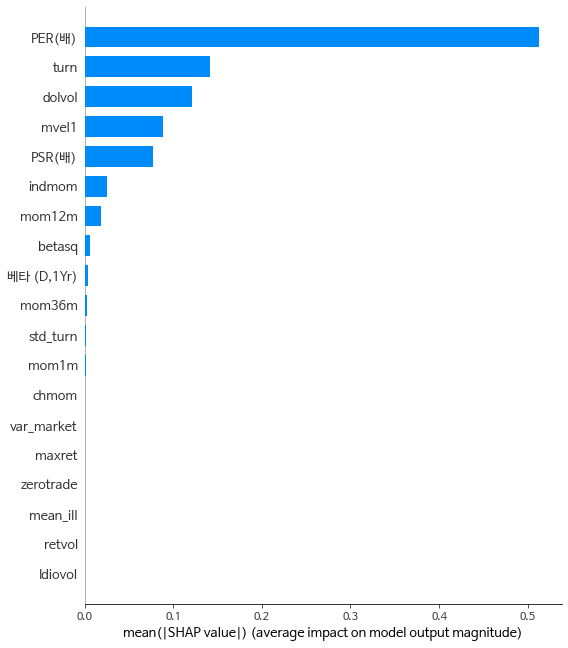

In [ ]:
shap.summary_plot(np.mean(shap_gbrt, axis=0), shap.sample(X_train.iloc[:, :19], 100, random_state=511), plot_type='bar')

In [ ]:
# RF
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_rf = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"RF_bayesian_r2oos_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_rf.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

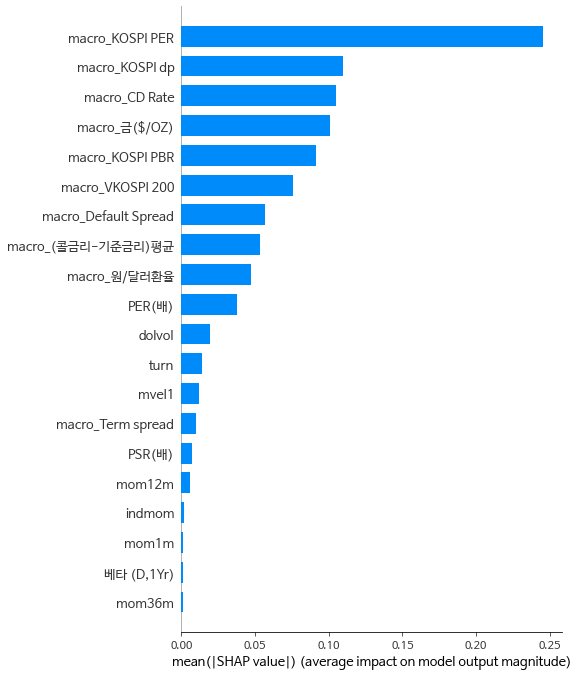

In [ ]:
shap.summary_plot(np.mean(shap_rf, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')

In [ ]:
# PLS
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pls = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PLS_r2oos_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pls.append(np.apply_along_axis(my_func, 1, abs(shap_values[0])[:, :19]))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
np.mean(np.mean(shap_pls, axis=0), axis=0)

array([0.02453007, 0.19908937, 0.12058235, 0.01753683, 0.01382271,
       0.00162433, 0.01963967, 0.01206735, 0.03097563, 0.01426599,
       0.01881441, 0.03498568, 0.06386401, 0.06871329, 0.06847715,
       0.09111354, 0.12837076, 0.03307374, 0.03845309])

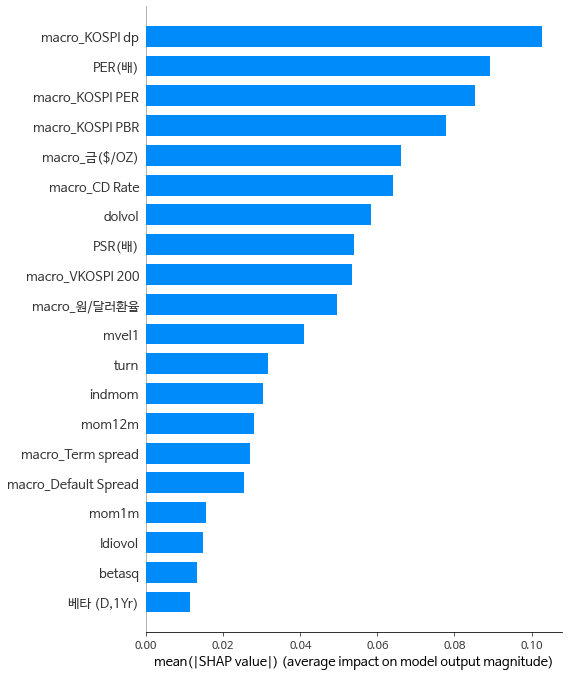

In [ ]:
shap.summary_plot(np.mean(shap_pls, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')

In [ ]:
# PCR
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pcr = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PCR_r2oos_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_pcr.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

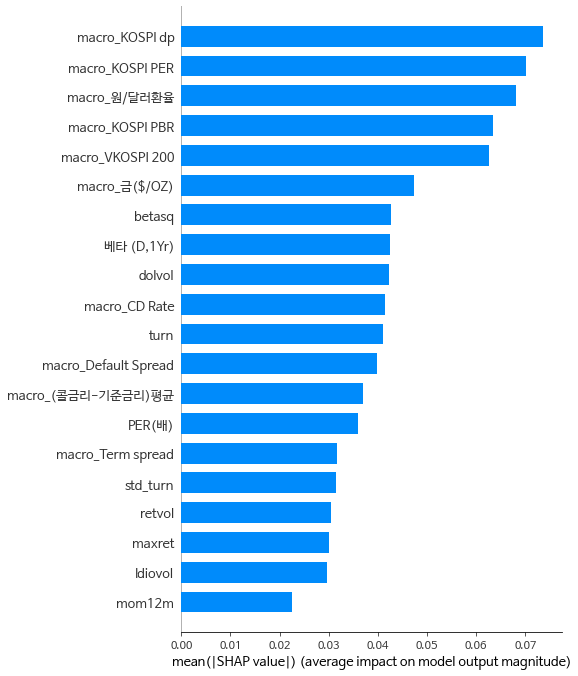

In [ ]:
shap.summary_plot(np.mean(shap_pcr, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')

In [ ]:
temp = pd.DataFrame({'GBRT' : np.mean(np.mean(shap_gbrt, axis=0), axis=0).tolist(),
                     'RF' : np.mean(np.mean(shap_rf, axis=0), axis=0).tolist(),
                     'PLS' : np.mean(np.mean(shap_pls, axis=0), axis=0).tolist(),
                     'PCR' : np.mean(np.mean(shap_pcr, axis=0), axis=0).tolist()}, index = X_train.columns[:19], dtype = float)
temp.head()

,GBRT,RF,PLS,PCR
"베타 (D,1Yr)",0.004052,0.010786,0.024530,0.086868
PER(배),0.512771,0.348423,0.199089,0.088226
PSR(배),0.077145,0.058363,0.120582,0.050542
chmom,0.000374,0.006864,0.017537,0.016100
mom36m,0.002400,0.014415,0.013823,0.043913


In [ ]:
np.sum(temp, axis=0)

GBRT    1.0
RF      1.0
PLS     1.0
PCR     1.0
dtype: float64

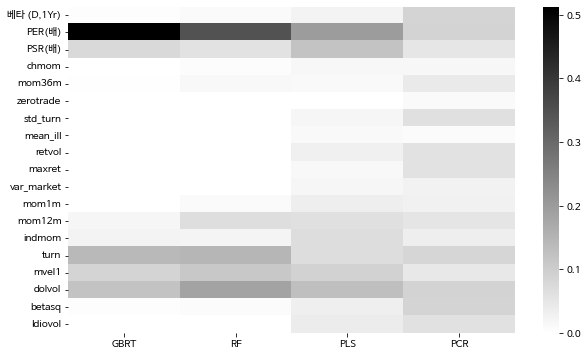

In [ ]:
# https://seong6496.tistory.com/252
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(temp, cmap='binary')

# IRR

In [ ]:
# GBRT
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_gbrt = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"GBRT_bayesian_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_gbrt.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

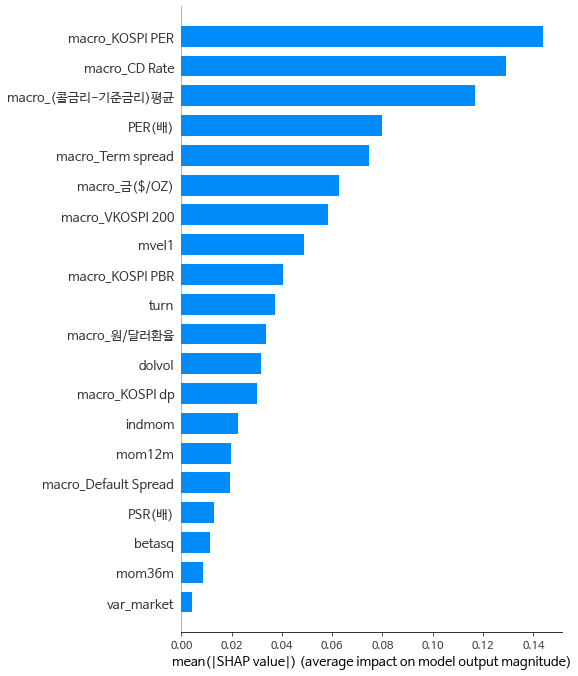

In [ ]:
shap.summary_plot(np.mean(shap_gbrt, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')

In [ ]:
# RF
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_rf = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"RF_bayesian_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_rf.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

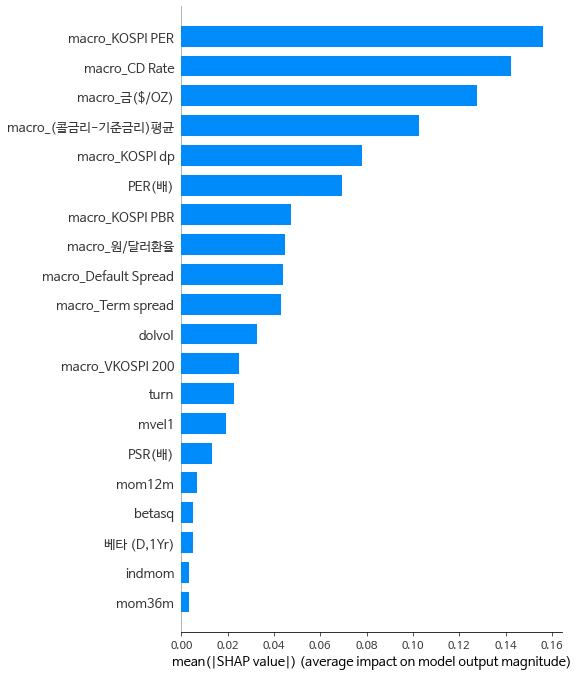

In [ ]:
shap.summary_plot(np.mean(shap_rf, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')

In [ ]:
# PLS
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pls = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PLS_irr"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pls.append(np.apply_along_axis(my_func, 1, abs(shap_values[0])))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

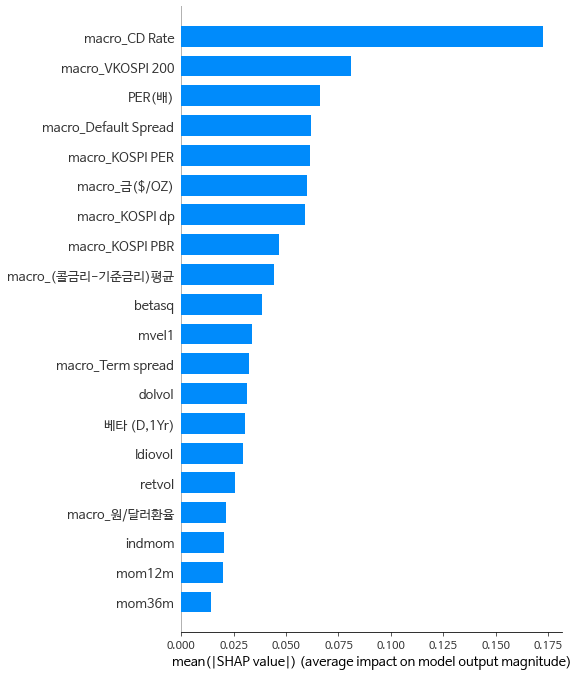

In [ ]:
shap.summary_plot(np.mean(shap_pls, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')

In [ ]:
# PCR
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pcr = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PCR_irr_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pcr.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
temp = np.mean(shap_pcr, axis=0)
np.mean(temp, axis=0)

array([0.03146344, 0.10289837, 0.02485294, 0.00793697, 0.01203415,
       0.00449682, 0.01032173, 0.00440386, 0.01153364, 0.00223592,
       0.01515822, 0.01661996, 0.02406795, 0.03341863, 0.00328598,
       0.05593456, 0.04758242, 0.03244685, 0.01349026, 0.04224759,
       0.02941982, 0.04615685, 0.0800978 , 0.05894584, 0.07423355,
       0.08996042, 0.0456166 , 0.0517527 , 0.02738617])

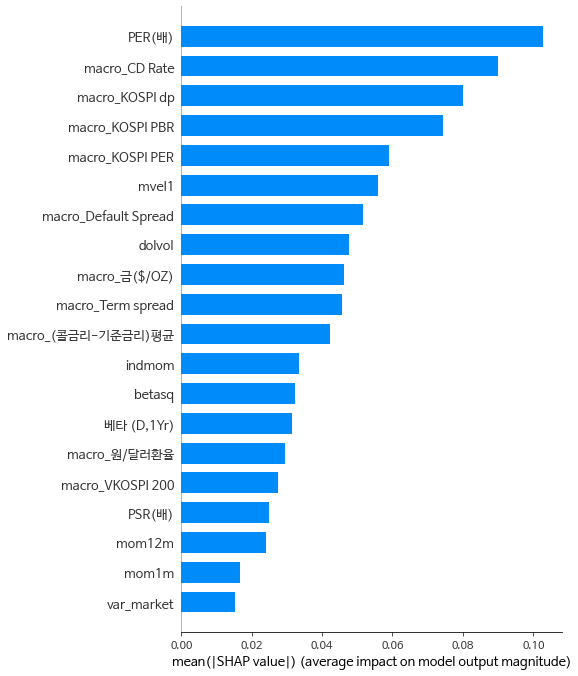

In [ ]:
shap.summary_plot(np.mean(shap_pcr, axis=0), shap.sample(X_train, 100, random_state=511), plot_type='bar')